## Analysis of geographical distribution of older population in LA County
#### Tomohiro Ujikawa  
Our group tries to analyze the discrepancy between public transit needs and current provisions. Older people are one of the populations that need transportation infrastructure, which is focused on revealing their geographical distribution.

In [1]:
import pandas as pd

#### load a data file and changing data type of FIPS into strings for leading zeros

In [2]:
#dtype ensures that the columns are read in as strings for leading zeros
df3 = pd.read_csv(
    'Data/means_of_commute.csv',
    dtype=
    {
        'FIPS':str,
    }
)
# dtype is the function is used for rewriting dictionary

/tmp/ipykernel_4234/1874007201.py:2: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,197,199,201,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,271,272,277,278,283,284,289,290,295,296,301,302,307,308,313,314,319,320,325,326,331,332,337,338,343,344,349,350,355,356,361,362,373,374,379,380,385,386,391,392,397,398,403,404,409,410,415,416,457,458,463,464,469,470,475,476,481,482,487,488,493,494,499,500,505,506,511,512,517,518,523,524,529,53

#### checking data types again and make sure the FIPS is converted to strings

In [3]:
df3.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 811 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    GEO_ID          2346 non-null   object 
 1    FIPS            2346 non-null   object 
 2    NAME            2346 non-null   object 
 3    S0802_C01_001E  2346 non-null   int64  
 4    S0802_C01_001M  2346 non-null   int64  
 5    S0802_C01_002E  2346 non-null   object 
 6    S0802_C01_002M  2346 non-null   object 
 7    S0802_C01_003E  2346 non-null   object 
 8    S0802_C01_003M  2346 non-null   object 
 9    S0802_C01_004E  2346 non-null   object 
 10   S0802_C01_004M  2346 non-null   object 
 11   S0802_C01_005E  2346 non-null   object 
 12   S0802_C01_005M  2346 non-null   object 
 13   S0802_C01_006E  2346 non-null   object 
 14   S0802_C01_006M  2346 non-null   object 
 15   S0802_C01_007E  2346 non-null   object 
 16   S0802_C01_007M  2346 non-null   object 
 17   S0802_C01_00

#### creating new dataframe including data to be used

In [4]:
# define columns to keep; you will have to look at your source's metadata to determine which columns to keep and what they mean
columns_to_keep2 = ['FIPS',
                   'S0802_C04_098E',]
# add it to a new dataframe
df4 = df3[columns_to_keep2]
# this function creates a new data frame

In [5]:
df4.columns = ['FIPS',
'Percentage of public transportation',]
# change the column names to common language

#### checking the list of columns

In [6]:
columns = list(df4) 
columns

['FIPS', 'Percentage of public transportation']

In [7]:
df4.sample(5)

,FIPS,Percentage of public transportation
1284,06037430803,0.97
596,06037212101,17.65
1476,06037501803,4.21
374,06037183820,13.00
914,06037274202,4.30


#### checking the data types again in the new dataframe

In [8]:
# look at the data types, verbose = True shows us all the counts
df4.info(verbose=True, show_counts=True)
# we can find which columns lack data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FIPS                                 2346 non-null   object 
 1   Percentage of public transportation  2346 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.8+ KB


#### checking some statistical characteristics of this data

In [9]:
# get some stats
df4['Percentage of public transportation'].describe()

count    2346.000000
mean        6.329344
std         7.348267
min         0.000000
25%         1.830000
50%         3.915000
75%         8.017500
max        72.520000
Name: Percentage of public transportation, dtype: float64

#### plot it as a historgram with 50 bins

<Axes: ylabel='Frequency'>

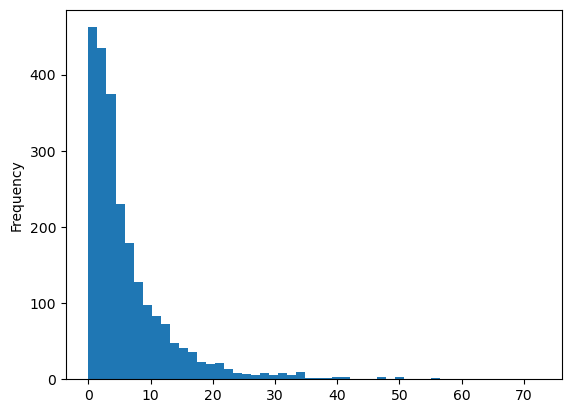

In [10]:
df4['Percentage of public transportation'].plot.hist(bins=50)

#### loading geodata

In [12]:
import geopandas as gpd

# Load the census tracts GeoDataFrame (read in a geojson file downloaded from the LA Times)
tracts = gpd.read_file('Data/Census_Tracts_2020.geojson')

# Load the city GeoDataFrame 
city = gpd.read_file('Data/LA_city_boundaries.geojson')

# Load the neighborhood GeoDataFrame 
neighborhoods = gpd.read_file('Data/LA_neighborhood_boundaries.geojson')

#### picking up the data to be used

In [13]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


#### create a FIPS column

In [14]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


### creating new geodataframe of LA city

In [15]:
# clipping with geopandas
# Select the desired cities
selected_cities = city[city['CITY_NAME'].isin(['Los Angeles'])]

# Create a new GeoDataFrame
new_gdf = gpd.GeoDataFrame(selected_cities)

# Clipping census tracts to selected_cities. Clip will select tracts
tractscities = gpd.clip(tracts, selected_cities)
tractscities

,CT20,geometry,FIPS
1037,276606,"POLYGON ((-118.43857 33.95600, -118.43621 33.9...",06037276606
1036,276605,"POLYGON ((-118.43330 33.95709, -118.43323 33.9...",06037276605
1039,276608,"POLYGON ((-118.42698 33.95433, -118.42720 33.9...",06037276608
1045,278102,"POLYGON ((-118.43358 33.97428, -118.43355 33.9...",06037278102
1035,276601,"POLYGON ((-118.43227 33.97502, -118.43223 33.9...",06037276601
...,...,...,...
15,103300,"POLYGON ((-118.34519 34.26790, -118.34500 34.2...",06037103300
2479,980021,"POLYGON ((-118.36152 34.27224, -118.36030 34.2...",06037980021
21,104124,"MULTIPOLYGON (((-118.38296 34.29333, -118.3829...",06037104124
45,106113,"POLYGON ((-118.41970 34.30684, -118.41857 34.3...",06037106113


#### check the information about this dataset

In [16]:
tractscities.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1289 entries, 1037 to 43
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CT20      1289 non-null   object  
 1   geometry  1289 non-null   geometry
 2   FIPS      1289 non-null   object  
dtypes: geometry(1), object(2)
memory usage: 40.3+ KB


#### spatial join

In [17]:
# Perform the spatial join
result = gpd.sjoin(tracts, city, how='inner', op='within')

# Print the result
print(result)

        CT20                                           geometry         FIPS  \
0     101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110   
1     101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122   
2     101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220   
3     101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221   
4     101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222   
...      ...                                                ...          ...   
2450  920332  POLYGON ((-118.53594 34.39170, -118.53599 34.3...  06037920332   
2451  920334  POLYGON ((-118.55201 34.39517, -118.55214 34.3...  06037920334   
2454  920340  POLYGON ((-118.53982 34.37976, -118.53949 34.3...  06037920340   
2455  920341  POLYGON ((-118.52407 34.37583, -118.52447 34.3...  06037920341   
2456  920342  POLYGON ((-118.52471 34.38013, -118.52477 34.3...  06037920342   

      index_right  OBJECTID      CITY_N

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


### merging census data (overall LA county) with geodata that only include LA cities and create clipped data

In [18]:
# FIPS must be used as strings!!
# create a new dataframe based on the join
tracts_transportation=tractscities.merge(df4,on="FIPS")
# on="FIPS" means "merge based on FIPS"
tracts_transportation.head()

,CT20,geometry,FIPS,Percentage of public transportation
0,278102,"POLYGON ((-118.43358 33.97428, -118.43355 33.9...",06037278102,0.00
1,276601,"POLYGON ((-118.43227 33.97502, -118.43223 33.9...",06037276601,1.52
2,274100,"POLYGON ((-118.44393 33.98721, -118.44279 33.9...",06037274100,3.04
3,274202,"POLYGON ((-118.46192 33.97900, -118.46192 33.9...",06037274202,4.30
4,273902,"POLYGON ((-118.45952 33.98785, -118.45870 33.9...",06037273902,2.61


#### mappint out the census data

<Axes: >

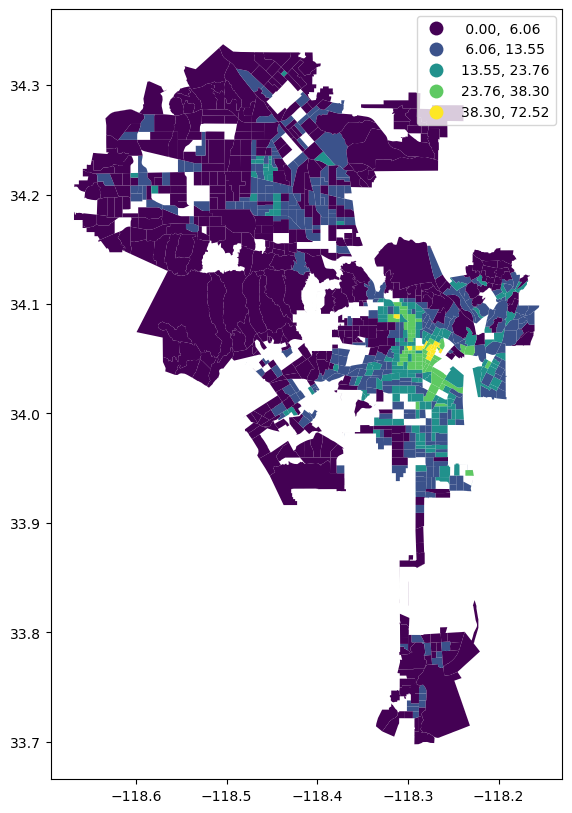

In [19]:
tracts_transportation.plot(figsize=(12,10),
                 column='Percentage of public transportation',
                 legend=True, 
                 scheme='NaturalBreaks')

#### importing/saving the created map

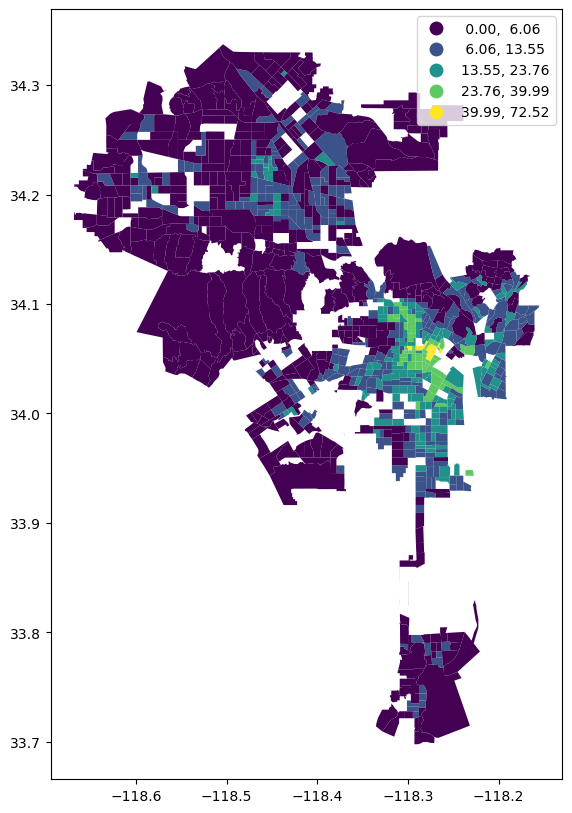

In [20]:
import matplotlib.pyplot as plt
ax = tracts_transportation.plot(figsize=(12,10),
                 column='Percentage of public transportation',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.figure.savefig('PercentagePublicTransportation.png')

In [30]:
tracts_transportation['PCT_transportation'] = tracts_transportation['Percentage of public transportation']

#add empty folium map 
import folium 
m = folium.Map(location=[34.051850, -118.243322], tiles=None)

folium.raster_layers.TileLayer(
    location=[34.051850, -118.243322],
    tiles='https://api.mapbox.com/styles/v1/cgiamarino/ckh3zcblc09pp19n0adewnboh/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    attr='Mapbox',
    API_key='pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    name='Monochrome',
    zoom_start=9  # Limited levels of zoom for free Mapbox tiles.
).add_to(m)


#create choropleth
folium.Choropleth(
    geo_data=tracts_transportation,
    name='SVI',
    data=tracts_transportation,
    popup=tracts_transportation.PCT_transportation,
    columns=['FIPS', 'PCT_transportation'],
    fill_color='PuRd',
    key_on='feature.properties.FIPS',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Social Vulnerability Index (SVI)'
).add_to(m)

#create feature group so that business layer can be added to drop down
f2=folium.FeatureGroup(name='Business Closures').add_to(m)

# add the businesses to the feature group
for index, row in df_map.iterrows():
    folium.Circle(
        radius=30,
        location=[row.lat,row.lon], 
        popup=row.business_name+ ' '+row.Address, 
        tooltip=row.business_name,
        overlay=False).add_to(f2)
    
folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)


NameError: name 'df_map' is not defined

### mapping data of percentage without vehicle (by clipping LA city data)

In [113]:
tracts2=gpd.read_file('Data/Without_Vehicle.geojson')
tracts2.head()

,tract,no_vehicle,no_vehicle_universe,no_vehicle_pct,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
0,06037101110,192,1494,12.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4842,1.232981e+07,14765.649004,"POLYGON ((-118.30077 34.25961, -118.30077 34.2..."
1,06037101122,9,1372,0.7,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4843,2.908866e+07,30028.213771,"POLYGON ((-118.30321 34.27334, -118.29971 34.2..."
2,06037101220,73,1357,5.4,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4844,7.532651e+06,12504.552130,"POLYGON ((-118.28594 34.25228, -118.28594 34.2..."
3,06037101221,215,1450,14.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4845,3.874399e+06,8938.421349,"POLYGON ((-118.29946 34.25598, -118.29319 34.2..."
4,06037101222,196,935,21.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4846,3.090538e+06,9750.960420,"POLYGON ((-118.29319 34.25233, -118.28863 34.2..."


In [117]:
# returns list of columns 
columns2 = list(tracts2) # this is the same as df.columns.to_list()
columns2

['tract',
 'no_vehicle',
 'no_vehicle_universe',
 'no_vehicle_pct',
 'sup_dist',
 'csa',
 'spa',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'geometry']

In [118]:
tracts2.columns = ['tract',
 'no_vehicle',
 'no_vehicle_universe',
 'Percentage of without vehicle',
 'sup_dist',
 'csa',
 'spa',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'geometry']
# change the column names to common language

In [120]:
# Clipping census tracts to selected_cities. Clip will select tracts
tracts2cities = gpd.clip(tracts2, selected_cities)
tracts2cities

,tract,no_vehicle,no_vehicle_universe,Percentage of without vehicle,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
1050,06037276606,11,1820,0.6,District 2,Los Angeles - Westchester,SPA 5 - West,5892,2.360108e+06,7249.355994,"POLYGON ((-118.43936 33.95777, -118.43857 33.9..."
1049,06037276605,17,1308,1.3,District 2,Los Angeles - Westchester,SPA 5 - West,5891,2.509882e+06,7961.153762,"POLYGON ((-118.43531 33.95968, -118.43404 33.9..."
1052,06037276608,49,1072,4.6,District 2,Los Angeles - Westchester,SPA 5 - West,5894,3.821364e+06,8504.297988,"POLYGON ((-118.42847 33.95972, -118.42496 33.9..."
1059,06037278102,9,1482,0.6,District 2,Los Angeles - Playa Del Rey,SPA 5 - West,5901,1.624911e+07,24720.607780,"MULTIPOLYGON (((-118.45131 33.96424, -118.4335..."
1048,06037276601,16,1623,1.0,District 2,Los Angeles - Westchester,SPA 5 - West,5890,2.414852e+07,23190.228602,"POLYGON ((-118.44502 33.96166, -118.44307 33.9..."
...,...,...,...,...,...,...,...,...,...,...,...
15,06037103300,69,1203,5.7,District 5,Los Angeles - Shadow Hills,SPA 2 - San Fernando,4857,6.602468e+07,37007.098021,"POLYGON ((-118.37121 34.26033, -118.36930 34.2..."
2486,06037980021,0,13,0.0,District 5,Los Angeles - Lakeview Terrace,SPA 2 - San Fernando,7328,7.508840e+07,50381.103471,"POLYGON ((-118.40042 34.27136, -118.39772 34.2..."
21,06037104124,21,1281,1.6,District 5,Unincorporated - Kagel/Lopez Canyons,SPA 2 - San Fernando,4863,4.795336e+07,37473.814135,"MULTIPOLYGON (((-118.38569 34.28210, -118.3829..."
45,06037106113,11,992,1.1,District 3,Los Angeles - Sylmar,SPA 2 - San Fernando,4887,1.556154e+07,19777.673775,"POLYGON ((-118.42783 34.31545, -118.42434 34.3..."


<Axes: >

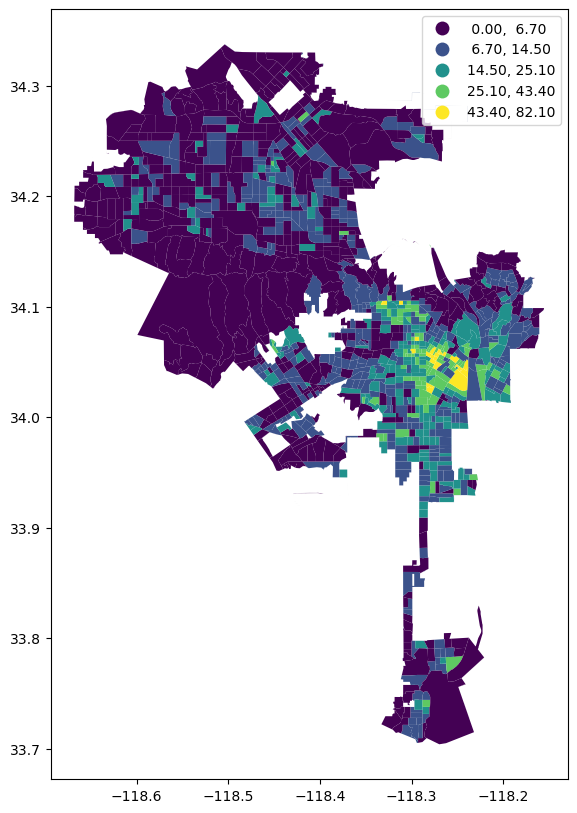

In [121]:
tracts2cities.plot(figsize=(12,10),
                 column='Percentage of without vehicle',
                 legend=True, 
                 scheme='NaturalBreaks')

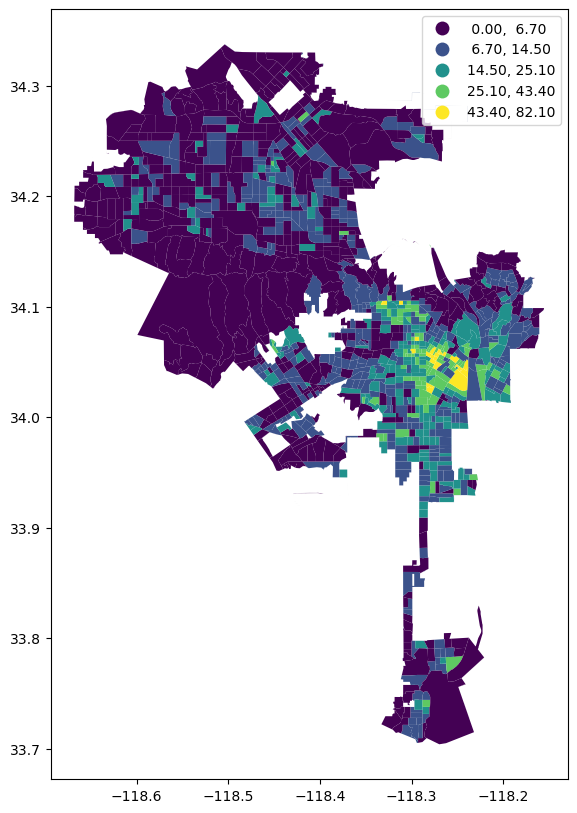

In [132]:
ax2 = tracts2cities.plot(figsize=(12,10),
                 column='Percentage of without vehicle',
                 legend=True, 
                 scheme='NaturalBreaks')
ax2.figure.savefig('PercentageWithoutVehicle.png')

In [123]:
tracts3=gpd.read_file('Data/Walkability_2012.geojson')
tracts3.head()

,OBJECTID,TOT_SQFT,GEOID10,GEOID10_1,LU_Diversi,LUDiv_Z,Intersecti,Inter_Z,Ret_Den,Ret_Z,Res_Den,Res_Z,Walkabilit,Walkabil_1,geometry
0,1,61700812,06037106510,06037106510,0.286888,-0.969699,38.860580,-1.787499,0.322552,-0.437202,28.712246,-0.158316,-3.352716,-5.140215,"POLYGON ((-118.46372 34.31840, -118.46483 34.3..."
1,2,22445154,06037106406,06037106406,0.453006,0.161020,142.846933,-0.622632,0.360047,-0.422248,7.836378,-0.404323,-1.288183,-1.910814,"POLYGON ((-118.45968 34.33003, -118.45965 34.3..."
2,3,27135797,06037106010,06037106010,0.415851,-0.091883,96.579907,-1.140921,0.000000,-0.565847,3.828881,-0.451548,-2.250198,-3.391119,"POLYGON ((-118.45968 34.33003, -118.45821 34.3..."
3,4,21722443,06037106020,06037106020,0.234912,-1.323478,118.079095,-0.900084,0.000000,-0.565847,4.573557,-0.442773,-3.232182,-4.132266,"POLYGON ((-118.41913 34.32319, -118.42037 34.3..."
4,5,41192667,06037106111,06037106111,0.401389,-0.190325,81.435488,-1.310570,0.000000,-0.565847,4.172580,-0.447498,-2.514240,-3.824810,"POLYGON ((-118.41913 34.32319, -118.41739 34.3..."


In [124]:
# returns list of columns 
columns3 = list(tracts3) # this is the same as df.columns.to_list()
columns3

['OBJECTID',
 'TOT_SQFT',
 'GEOID10',
 'GEOID10_1',
 'LU_Diversi',
 'LUDiv_Z',
 'Intersecti',
 'Inter_Z',
 'Ret_Den',
 'Ret_Z',
 'Res_Den',
 'Res_Z',
 'Walkabilit',
 'Walkabil_1',
 'geometry']

In [125]:
tracts3.columns = ['OBJECTID',
 'TOT_SQFT',
 'GEOID10',
 'GEOID10_1',
 'LU_Diversi',
 'LUDiv_Z',
 'Intersecti',
 'Inter_Z',
 'Ret_Den',
 'Ret_Z',
 'Res_Den',
 'Res_Z',
 'Walkability',
 'Walkabil_1',
 'geometry']
# change the column names to common language

<Axes: >

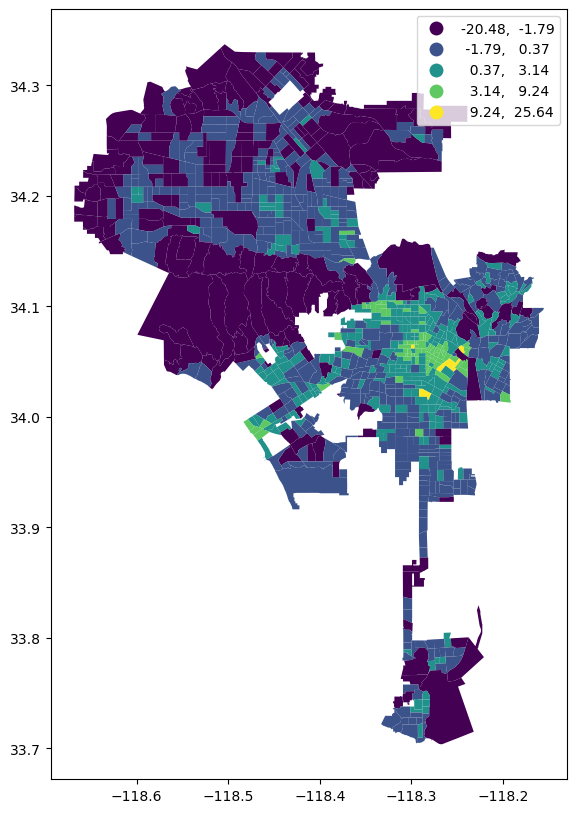

In [130]:
tracts3.plot(figsize=(12,10),
                 column='Walkability',
                 legend=True, 
                 scheme='NaturalBreaks')

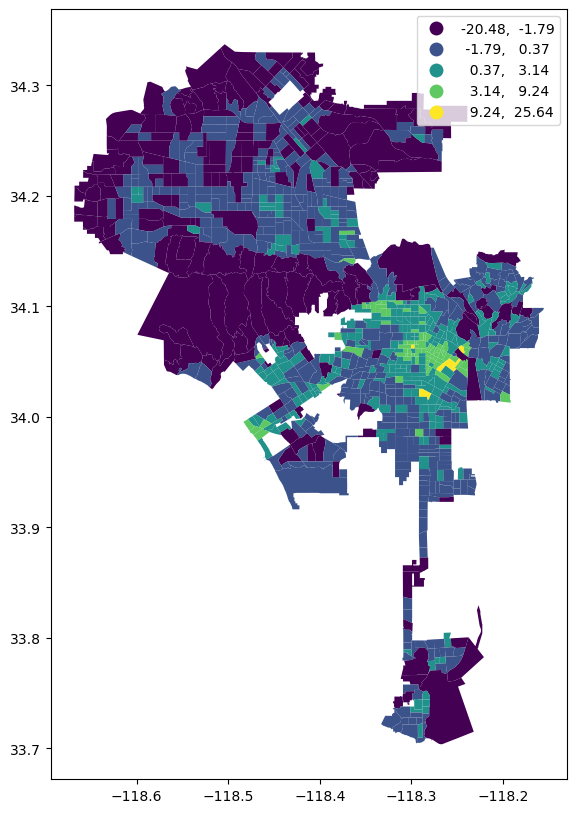

In [133]:
ax3 = tracts3.plot(figsize=(12,10),
                 column='Walkability',
                 legend=True, 
                 scheme='NaturalBreaks')
ax3.figure.savefig('Walkability.png')